`Problem Statement`
- Insurance companies need to accurately predict the cost of health insurance for individuals to set premiums appropriately. However, traditional methods of cost prediction often rely on broad actuarial tables and historical averages, which may not account for the nuanced differences among individuals. By leveraging machine learning techniques, insurers can predict more accurately the insurance costs tailored to individual profiles, leading to more competitive pricing and better risk management


## Dataset Description

| Attribute               | Type     | Range/Values         |
|--------------------------|----------|----------------------|
| Age                      | Numeric  | 18–66                |
| Diabetes                 | Binary   | 0 = No, 1 = Yes      |
| BloodPressureProblems    | Binary   | 0 = No, 1 = Yes      |
| AnyTransplants           | Binary   | 0 = No, 1 = Yes      |
| AnyChronicDiseases       | Binary   | 0 = No, 1 = Yes      |
| Height                   | Numeric  | 145–188 cm           |
| Weight                   | Numeric  | 51–132 kg            |
| KnownAllergies           | Binary   | 0 = No, 1 = Yes      |
| HistoryOfCancerInFamily  | Binary   | 0 = No, 1 = Yes      |
| NumberOfMajorSurgeries   | Numeric  | 0–3                  |
| PremiumPrice             | Numeric  | 15,000–40,000        |


In [1]:
import pandas as pd
file_id = "1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS"
df = pd.read_csv(f"https://drive.google.com/uc?id={file_id}")

In [2]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [4]:
df.shape

(986, 11)

In [5]:
df.isna().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


# Univariate Anaysis

#### For `Age`

In [6]:
import seaborn as sns

<Axes: xlabel='Age_bin'>

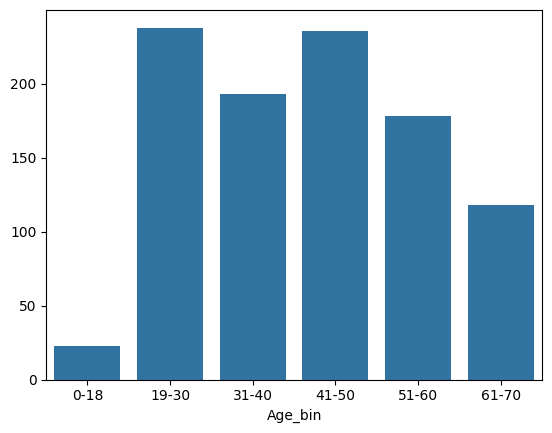

In [7]:
df['Age_bin'] = pd.cut(
    df['Age'],
    bins=[0,18,30,40,50,60,70],
    labels=['0-18','19-30','31-40','41-50','51-60','61-70']
)


age_counts = df['Age_bin'].value_counts().sort_index()

sns.barplot(x=age_counts.index, y=age_counts.values)


#### For `Diabetes`

In [8]:
import matplotlib.pyplot as plt

,count
Diabetes,
0,572
1,414


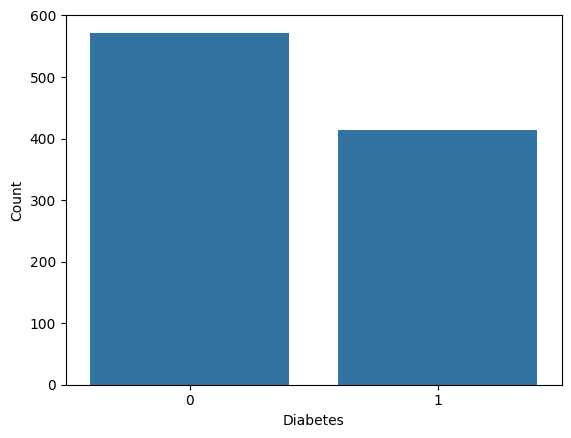

In [9]:
def bar(col):
    x = df[col].value_counts().reset_index()
    x.columns = [col, 'Count']
    sns.barplot(data=x, x=col, y='Count')
    return df[col].value_counts()
bar('Diabetes')

#### For `BloodPressureProblems`

,count
BloodPressureProblems,
0,524
1,462


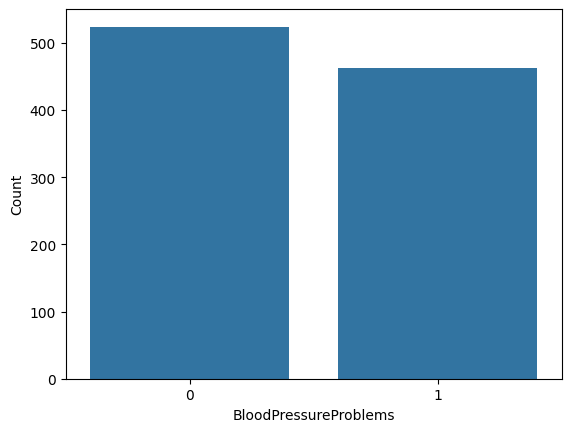

In [10]:
bar('BloodPressureProblems')

For `AnyTransplants`

,count
AnyTransplants,
0,931
1,55


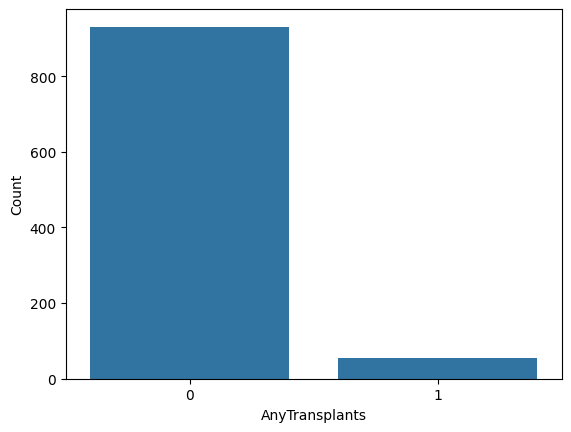

In [11]:
bar('AnyTransplants')

For `AnyChronicDiseases`

,count
AnyChronicDiseases,
0,808
1,178


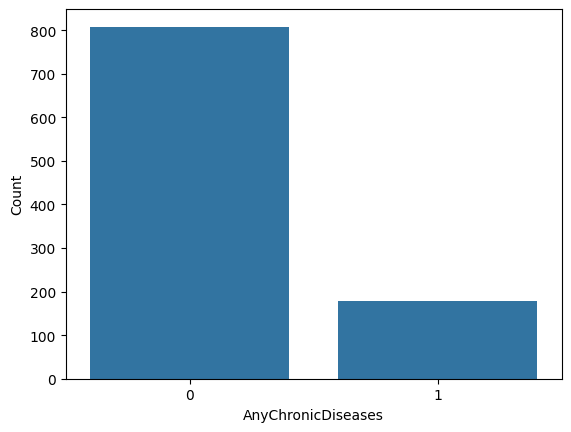

In [12]:
bar('AnyChronicDiseases')

For `Height` and `Weight`

<Axes: xlabel='Height_bin'>

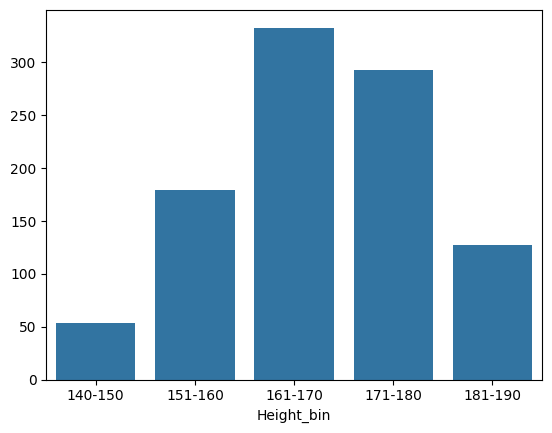

In [13]:
df['Height_bin'] = pd.cut(
    df['Height'],
    bins=[140,150,160,170,180,190],   # bin edges as per height range
    labels=['140-150','151-160','161-170','171-180','181-190']
)

height_counts = df['Height_bin'].value_counts().sort_index()
sns.barplot(x=height_counts.index, y=height_counts.values)


For `Weight`

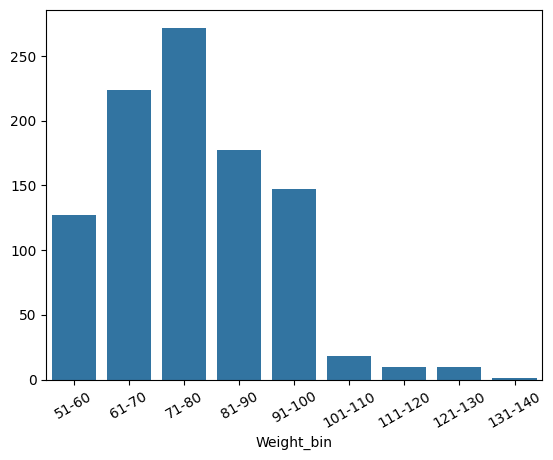

In [14]:
df['Weight_bin'] = pd.cut(
    df['Weight'],
    bins=[50,60,70,80,90,100,110,120,130,140],   # bin edges
    labels=['51-60','61-70','71-80','81-90','91-100','101-110','111-120','121-130','131-140']
)

weight_counts = df['Weight_bin'].value_counts().sort_index()
sns.barplot(x=weight_counts.index, y=weight_counts.values)

plt.xticks(rotation=30)
plt.show()

For `KnownAllergies`

,count
KnownAllergies,
0,774
1,212


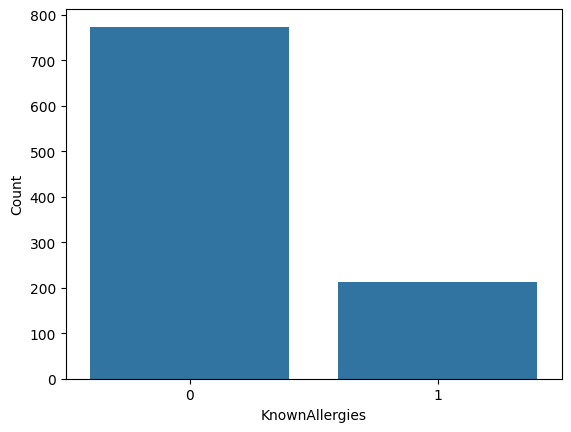

In [15]:
bar('KnownAllergies')

For `HistoryOfCancerInFamily`

,count
HistoryOfCancerInFamily,
0,870
1,116


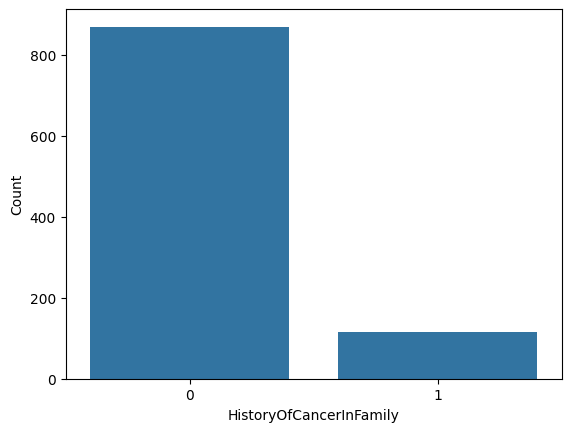

In [16]:
bar('HistoryOfCancerInFamily')

#### For `NumberOfMajorSurgeries`

,count
NumberOfMajorSurgeries,
0,479
1,372
2,119
3,16


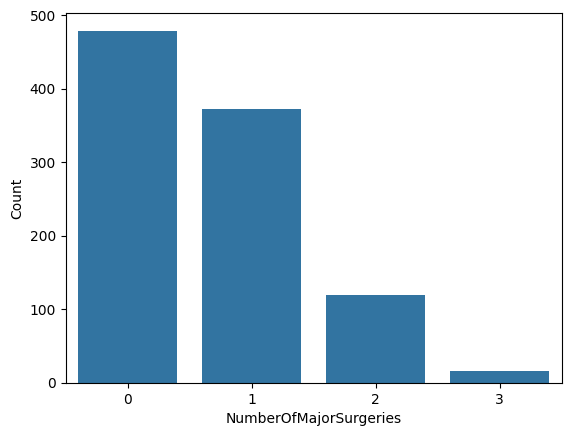

In [17]:
bar('NumberOfMajorSurgeries')

#### For `PremiumPrice`

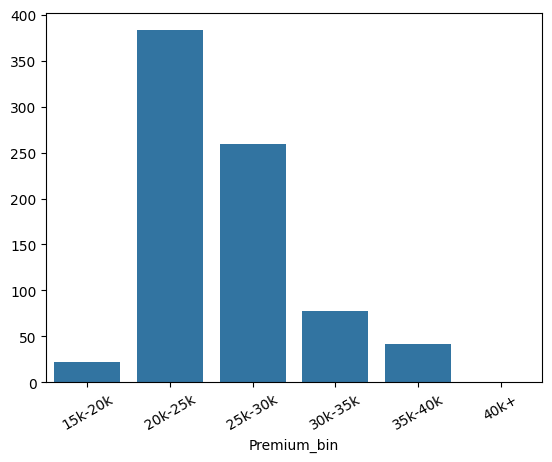

In [18]:
df['Premium_bin'] = pd.cut(
    df['PremiumPrice'],
    bins=[15000,20000,25000,30000,35000,40000,45000],
    labels=['15k-20k','20k-25k','25k-30k','30k-35k','35k-40k','40k+']
)
premium_counts = df['Premium_bin'].value_counts().sort_index()
sns.barplot(x=premium_counts.index, y=premium_counts.values)
plt.xticks(rotation=30)
plt.show()

# Multi-Variate Analysis

#### Made a ill Column

In [19]:
# Illness check
ill_cols = [
    'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
    'AnyChronicDiseases', 'KnownAllergies'
]

# Agar inme se koi bhi > 0 ho to ill = 1, else 0
df['ill'] = df[ill_cols].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

df[['Age','ill']].head()


,Age,ill
0,45,0
1,60,1
2,36,1
3,52,1
4,38,1


/tmp/ipython-input-1573204809.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


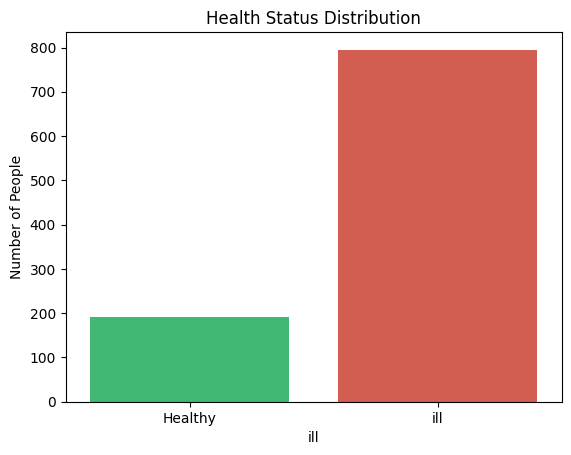

In [20]:
# Count of healthy (0) vs ill (1)
ill_counts = df['ill'].value_counts().sort_index()

# Barplot
sns.barplot(
    x=ill_counts.index,
    y=ill_counts.values,
    palette=['#2ecc71','#e74c3c']  # green for healthy, red for ill
)

# Labels
plt.xticks([0,1], ['Healthy','ill'])
plt.ylabel('Number of People')
plt.title('Health Status Distribution')
plt.show()


Health Status Distribution


---


- **Healthy** → ~200 people  
- **Ill** → ~800 people  
- Majority of people are **ill**, only a small portion are **healthy**.


---

####  `Age_bin` VS `PremiumPrice`

/tmp/ipython-input-812606666.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_premium_counts = df.groupby('Age_bin')['PremiumPrice'].value_counts().reset_index(name='Count')


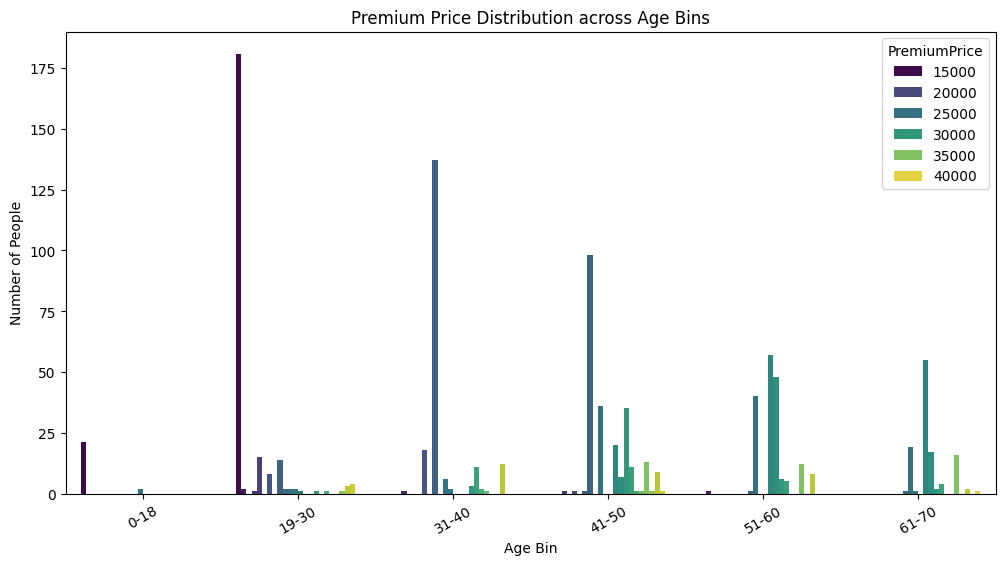

In [21]:

# Group by Age_bin and PremiumPrice count
age_premium_counts = df.groupby('Age_bin')['PremiumPrice'].value_counts().reset_index(name='Count')

# Barplot
plt.figure(figsize=(12,6))
sns.barplot(
    data=age_premium_counts,
    x='Age_bin',
    y='Count',
    hue='PremiumPrice',    # different colors for different PremiumPrice
    palette='viridis'
)
plt.xticks(rotation=30)
plt.title('Premium Price Distribution across Age Bins')
plt.ylabel('Number of People')
plt.xlabel('Age Bin')
plt.legend(title='PremiumPrice')
plt.show()

`Premium Price Distribution across Age`


- **0–18, 19–30** → Mostly ₹15,000 premium  
- **31–40, 41–50** → ₹25,000 dominates  
- **51–60, 61–70** → ₹30,000 dominates  
- Higher premiums (₹35,000–₹40,000) → Fewer people across all bins


---




In [22]:
import scipy.stats as stats

# Create groups based on Age_bin
groups = [df[df['Age_bin'] == bin]['PremiumPrice'] for bin in df['Age_bin'].unique()]

# Apply one-way ANOVA
f_stat, p_val = stats.f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject H₀ → PremiumPrice varies significantly across Age bins")
else:
    print("Fail to Reject H₀ → No significant difference across Age bins")


F-statistic: 234.33019765008285
p-value: 1.4489324041124089e-164
Reject H₀ → PremiumPrice varies significantly across Age bins


`🔹 ANOVA Test: PremiumPrice vs Age_bin`

**Variables Tested**  
- **Age_bin (categorical)**  
- **PremiumPrice (continuous)**  

---
`Hypotheses`  
- **H₀ (Null):** The mean PremiumPrice is the same across all Age bins.  
- **H₁ (Alternative):** The mean PremiumPrice differs across Age bins.  

---

`Results`  
- **F-statistic:** 234.33  
- **p-value:** 1.45 × 10⁻¹⁶⁴  

---

`Decision`  
✅ Since **p-value << 0.05**, we **Reject H₀**.  
👉 Conclusion: **PremiumPrice varies significantly across Age bins**.  

---

`Interpretation`  
Different age groups pay **different insurance premiums**, indicating a strong association between age and premium amount.


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      986 non-null    int64   
 1   Diabetes                 986 non-null    int64   
 2   BloodPressureProblems    986 non-null    int64   
 3   AnyTransplants           986 non-null    int64   
 4   AnyChronicDiseases       986 non-null    int64   
 5   Height                   986 non-null    int64   
 6   Weight                   986 non-null    int64   
 7   KnownAllergies           986 non-null    int64   
 8   HistoryOfCancerInFamily  986 non-null    int64   
 9   NumberOfMajorSurgeries   986 non-null    int64   
 10  PremiumPrice             986 non-null    int64   
 11  Age_bin                  986 non-null    category
 12  Height_bin               986 non-null    category
 13  Weight_bin               986 non-null    category
 14  Premium_bi

#### `ill` vs `PremiumPrice`

In [24]:
contingency = pd.crosstab(df['ill'], df['Premium_bin'])
print(contingency)

Premium_bin  15k-20k  20k-25k  25k-30k  30k-35k  35k-40k
ill                                                     
0                  2       80       23       11        1
1                 20      303      236       67       41


In [25]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square value:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

#Decision
alpha = 0.05  # significance level
if p < alpha:
    print("\nDecision: Reject H₀ → Illness status and Premium category ARE associated.")
else:
    print("\nDecision: Fail to Reject H₀ → Illness status and Premium category are NOT associated.")

Chi-square value: 24.015560217851522
p-value: 7.930316958639924e-05
Degrees of freedom: 4
Expected frequencies:
 [[  3.28316327  57.15688776  38.65178571  11.64030612   6.26785714]
 [ 18.71683673 325.84311224 220.34821429  66.35969388  35.73214286]]

Decision: Reject H₀ → Illness status and Premium category ARE associated.


🔹`Chi-Square Test of Independence`

**Variables Tested**  
- **ill (disease status)**  
- **Premium_bin (premium category)**  

---

`Hypotheses`
- **H₀ (Null):** Illness status and Premium category are independent (no association).  
- **H₁ (Alternative):** Illness status and Premium category are associated.  

---

`Results`  
- **Chi-square value:** 24.016  
- **Degrees of freedom (df):** 4  
- **p-value:** 0.000079  

- **Expected Frequencies Table:**

| ill | Bin1 | Bin2 | Bin3 | Bin4 | Bin5 |
|-----|------|------|------|------|------|
| 0   | 3.28 | 57.16 | 38.65 | 11.64 | 6.27 |
| 1   | 18.72 | 325.84 | 220.35 | 66.36 | 35.73 |

---

`Decision`
✅ Since **p-value (0.000079) < 0.05**, we **Reject H₀**.  
👉 Illness status and Premium category **ARE significantly associated**.  


#### For `Diabetes` vs `PremiumPrice`

#### Making BMI

In [26]:
# Height cm → m
df['Height_m'] = df['Height'] / 100

# BMI calculation
df['BMI'] = round(df['Weight'] / (df['Height_m'] ** 2),4)

df[['Height', 'Weight', 'BMI']].head()

,Height,Weight,BMI
0,155,57,23.7253
1,180,73,22.5309
2,158,59,23.6340
3,183,93,27.7703
4,166,88,31.9350


making Categaory in BMI

In [27]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_category'] = df['BMI'].apply(bmi_category)

df[['BMI','BMI_category']].head()

,BMI,BMI_category
0,23.7253,Normal
1,22.5309,Normal
2,23.6340,Normal
3,27.7703,Overweight
4,31.9350,Obese


In [28]:
df.groupby('ill')['BMI_category'].value_counts()

ill  BMI_category
0    Normal           62
     Obese            62
     Overweight       56
     Underweight      11
1    Overweight      269
     Normal          257
     Obese           241
     Underweight      28
Name: count, dtype: int64

`🔹 BMI Category Distribution by Illness Status`

`Variables`
- **ill**: 0 = Not ill , 1 = ill  
- **BMI_category**: Underweight, Normal, Overweight, Obese  

---

`Frequency Table`

| ill | BMI_category | Count |
|-----|--------------|-------|
| 0   | Normal       | 62    |
| 0   | Obese        | 62    |
| 0   | Overweight   | 56    |
| 0   | Underweight  | 11    |
| 1   | Overweight   | 269   |
| 1   | Normal       | 257   |
| 1   | Obese        | 241   |
| 1   | Underweight  | 28    |

---

`Interpretation`
- Among **non-ill people (ill=0)**: Normal and Obese categories are equally common, followed by Overweight, and Underweight is the least.  
- Among **ill people (ill=1)**: Overweight is most common, followed closely by Normal and Obese, with Underweight being the least.  

👉 This shows that **illness status has some association with BMI distribution**, e.g., more ill people are Overweight or Obese compared to non-ill people.


#### BMI vs PremiumPrice

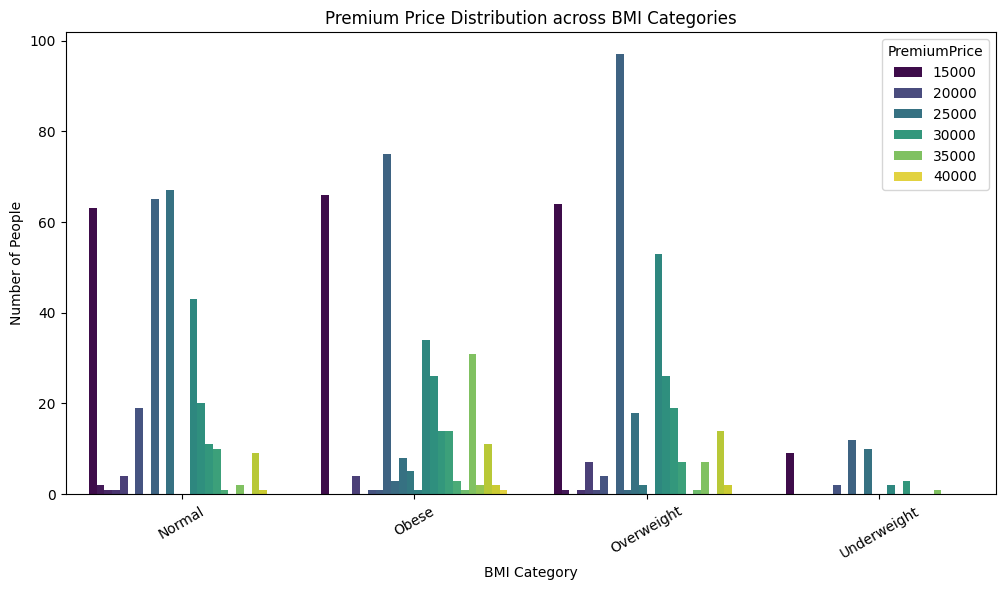

In [29]:

# Step 1: Group and count
bmi_premium_counts = df.groupby('BMI_category')['PremiumPrice'].value_counts().reset_index(name='Count')

# Step 2: Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=bmi_premium_counts,
    x='BMI_category',
    y='Count',
    hue='PremiumPrice',  # Alag-alag color for each PremiumPrice
    palette='viridis'
)

plt.title('Premium Price Distribution across BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Number of People')
plt.legend(title='PremiumPrice')
plt.xticks(rotation=30)
plt.show()

**Key Insights:**

1. Premiums of ₹20,000–₹25,000 dominate across all BMI categories.  
2. Overweight individuals face the highest premiums, with many paying ₹30,000–₹35,000.  
3. Normal and underweight categories mostly pay lower premiums (₹15,000–₹25,000).  
4. Obese individuals show a shift toward higher premiums compared to normal BMI.  

**Takeaway:** Premium costs rise with higher BMI, especially in overweight and obese groups.


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      986 non-null    int64   
 1   Diabetes                 986 non-null    int64   
 2   BloodPressureProblems    986 non-null    int64   
 3   AnyTransplants           986 non-null    int64   
 4   AnyChronicDiseases       986 non-null    int64   
 5   Height                   986 non-null    int64   
 6   Weight                   986 non-null    int64   
 7   KnownAllergies           986 non-null    int64   
 8   HistoryOfCancerInFamily  986 non-null    int64   
 9   NumberOfMajorSurgeries   986 non-null    int64   
 10  PremiumPrice             986 non-null    int64   
 11  Age_bin                  986 non-null    category
 12  Height_bin               986 non-null    category
 13  Weight_bin               986 non-null    category
 14  Premium_bi

# Using SM machine for the Feature Selection

In [31]:
import scipy.stats as stats
import pandas as pd

# Target column: PremiumPrice (binary)
target = 'PremiumPrice'

results = []

for col in df.columns:
    if col == target:
        continue

    if df[col].dtype == 'object' or str(df[col].dtype) == 'category':
        # Categorical vs categorical → Chi-square
        contingency = pd.crosstab(df[target], df[col])
        chi2, p, dof, ex = stats.chi2_contingency(contingency)
        results.append({'Column': col, 'Test': 'Chi-square', 'p-value': p})
    else:
        # Continuous vs categorical → t-test (if binary) / ANOVA (if more than 2 categories)
        if df[target].nunique() == 2:
            group1 = df[df[target]==0][col]
            group2 = df[df[target]==1][col]
            t_stat, p = stats.ttest_ind(group1, group2)
            results.append({'Column': col, 'Test': 't-test', 'p-value': p})
        else:
            # For more than 2 categories, ANOVA
            groups = [df[df[target]==cat][col] for cat in df[target].unique()]
            f_stat, p = stats.f_oneway(*groups)
            results.append({'Column': col, 'Test': 'ANOVA', 'p-value': p})

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values('p-value')
results_df


,Column,Test,p-value
13,Premium_bin,Chi-square,0.000000e+00
0,Age,ANOVA,1.044830e-317
10,Age_bin,Chi-square,2.017166e-257
3,AnyTransplants,ANOVA,4.725489e-201
9,NumberOfMajorSurgeries,ANOVA,7.717742e-184
4,AnyChronicDiseases,ANOVA,4.053878e-81
8,HistoryOfCancerInFamily,ANOVA,4.156906e-62
12,Weight_bin,Chi-square,7.626786e-55
6,Weight,ANOVA,4.657291e-44
16,BMI,ANOVA,4.712169e-22



`Interpretation`
- **Significant columns (p < 0.05):** Strongly associated with PremiumPrice.  
  Examples: `Age`, `BMI`, `Diabetes`, `ill`, `AnyChronicDiseases`, `Premium_bin`, etc.  

- **Non-significant columns (p ≥ 0.05):** Weak or no association with PremiumPrice.  
  Examples: `Height`, `Height_m`, `Height_bin`  

✅ Recommendation: Focus on **significant columns** for modeling or further analysis.

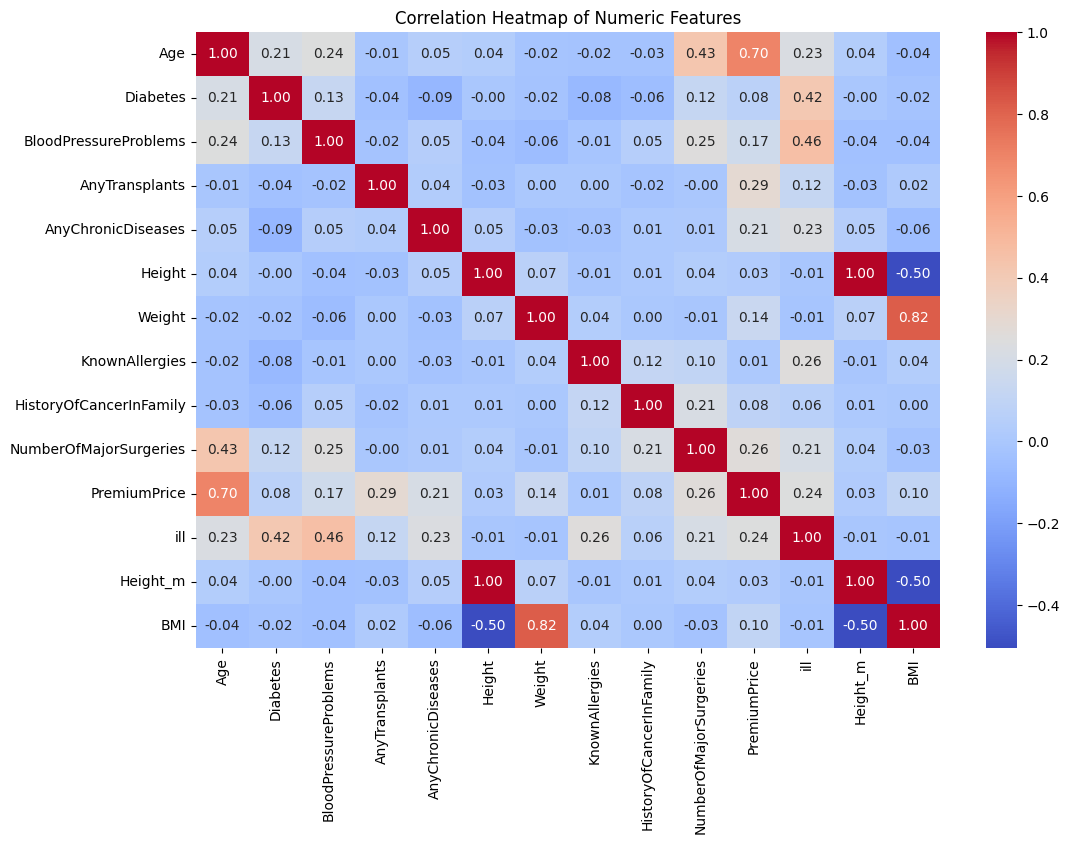

In [32]:

# Correlation matrix (sirf numeric columns ke liye)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [33]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

# Correlation matrix
corr_matrix = df[numeric_cols].corr()

# PremiumPrice ke saath correlation values
corr_with_target = corr_matrix['PremiumPrice'].sort_values(ascending=False)
print(corr_with_target)


PremiumPrice               1.000000
Age                        0.697540
AnyTransplants             0.289056
NumberOfMajorSurgeries     0.264250
ill                        0.244220
AnyChronicDiseases         0.208610
BloodPressureProblems      0.167097
Weight                     0.141507
BMI                        0.103812
HistoryOfCancerInFamily    0.083139
Diabetes                   0.076209
Height_m                   0.026910
Height                     0.026910
KnownAllergies             0.012103
Name: PremiumPrice, dtype: float64


`🔹 Interpretation`

- **Strong positive correlation:**  
  - `Age` (0.6975) → PremiumPrice strongly increases with age.  

- **Moderate correlation:**  
  - `AnyTransplants`, `NumberOfMajorSurgeries`, `ill` → moderately associated with PremiumPrice.  

- **Weak correlation:**  
  - `BMI`, `Weight`, `HistoryOfCancerInFamily`, `Diabetes`, `BloodPressureProblems` → slight effect.  

- **Negligible correlation:**  
  - `Height`, `Height_m`, `KnownAllergies` → very little effect on PremiumPrice.  

✅ Recommendation: Modeling / analysis should **focus on high and moderate correlation features** like `Age`, `AnyTransplants`, `NumberOfMajorSurgeries`, `ill`.

# Feature Selection

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      986 non-null    int64   
 1   Diabetes                 986 non-null    int64   
 2   BloodPressureProblems    986 non-null    int64   
 3   AnyTransplants           986 non-null    int64   
 4   AnyChronicDiseases       986 non-null    int64   
 5   Height                   986 non-null    int64   
 6   Weight                   986 non-null    int64   
 7   KnownAllergies           986 non-null    int64   
 8   HistoryOfCancerInFamily  986 non-null    int64   
 9   NumberOfMajorSurgeries   986 non-null    int64   
 10  PremiumPrice             986 non-null    int64   
 11  Age_bin                  986 non-null    category
 12  Height_bin               986 non-null    category
 13  Weight_bin               986 non-null    category
 14  Premium_bi

In [35]:
df=df.drop(columns=['Height','Weight','Height_m','Height_bin','Weight_bin'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      986 non-null    int64   
 1   Diabetes                 986 non-null    int64   
 2   BloodPressureProblems    986 non-null    int64   
 3   AnyTransplants           986 non-null    int64   
 4   AnyChronicDiseases       986 non-null    int64   
 5   KnownAllergies           986 non-null    int64   
 6   HistoryOfCancerInFamily  986 non-null    int64   
 7   NumberOfMajorSurgeries   986 non-null    int64   
 8   PremiumPrice             986 non-null    int64   
 9   Age_bin                  986 non-null    category
 10  Premium_bin              784 non-null    category
 11  ill                      986 non-null    int64   
 12  BMI                      986 non-null    float64 
 13  BMI_category             986 non-null    object  
dtypes: categor

#### Making Health score

In [37]:

df["HealthScore"] = (
    (100 - df["Age"] * 0.2) +
    (100 - df["Diabetes"] * 20) +
    (100 - df["BloodPressureProblems"] * 15) +
    (100 - df["AnyTransplants"] * 30) +
    (100 - df["AnyChronicDiseases"] * 25) +
    (100 - df["KnownAllergies"] * 10) +
    (100 - df["HistoryOfCancerInFamily"] * 20) +
    (100 - df["NumberOfMajorSurgeries"] * 10)
) / 8
df["HealthScore"] = df["HealthScore"].clip(0, 100).round(2)

print(df[["Age", "Diabetes", "BloodPressureProblems", "HealthScore"]].head())

   Age  Diabetes  BloodPressureProblems  HealthScore
0   45         0                      0        98.88
1   60         1                      0        96.00
2   36         1                      1        93.48
3   52         1                      1        88.70
4   38         0                      0        94.68


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      986 non-null    int64   
 1   Diabetes                 986 non-null    int64   
 2   BloodPressureProblems    986 non-null    int64   
 3   AnyTransplants           986 non-null    int64   
 4   AnyChronicDiseases       986 non-null    int64   
 5   KnownAllergies           986 non-null    int64   
 6   HistoryOfCancerInFamily  986 non-null    int64   
 7   NumberOfMajorSurgeries   986 non-null    int64   
 8   PremiumPrice             986 non-null    int64   
 9   Age_bin                  986 non-null    category
 10  Premium_bin              784 non-null    category
 11  ill                      986 non-null    int64   
 12  BMI                      986 non-null    float64 
 13  BMI_category             986 non-null    object  
 14  HealthScor

In [39]:
# Remove bin columns if present
df = df.drop(columns=['Age_bin', 'Premium_bin', 'BMI_category','ill'])

# Models Testing

## Linear Regression

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

# Independent Variables and Removing The Unnessary Columns
X=df.drop(columns=['PremiumPrice','HealthScore'])
y=df['PremiumPrice']

# Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Linear Regression
lr=LinearRegression()
lr.fit(X_train,y_train)

# Predictions
y_pred=lr.predict(X_test)

# Metrics
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('R^2 Score:',r2)
print('RMSE:',rmse)

R^2 Score: 0.7078372148822082
RMSE: 3529.6794110790606


`Model Performance`

1. R² Score: 0.7078372148822082
2. RMSE: 3529.6794110790606

`Interpretation`:
- The model explains approximately 70.8% of the variance in the target variable.
- The average prediction error is around 3529.68 units, indicating the typical deviation between predicted and actual insurance premiums.


                   Feature  Coefficient
3           AnyTransplants  7410.505579
4       AnyChronicDiseases  2560.183882
6  HistoryOfCancerInFamily  2128.597159
0                      Age   325.528143
5           KnownAllergies   167.605685
8                      BMI   141.854284
2    BloodPressureProblems    83.293983
1                 Diabetes  -365.234855
7   NumberOfMajorSurgeries  -659.548809


/tmp/ipython-input-77952667.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='viridis')


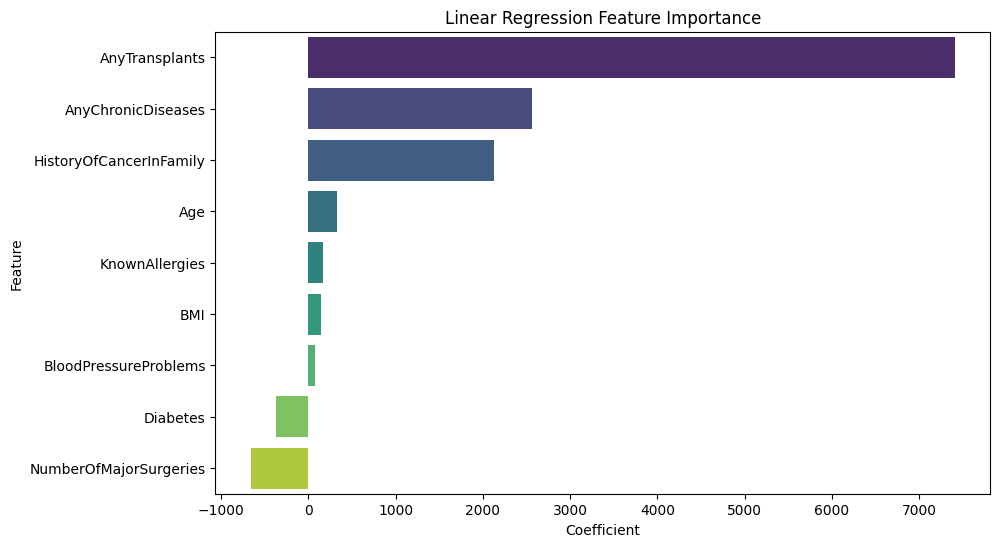

In [41]:
# Feature importance using coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='viridis')
plt.title('Linear Regression Feature Importance')
plt.show()

`Conclusion`

- The Linear Regression model identifies key factors influencing health insurance premiums.
- **Major positive contributors**:
  - **AnyTransplants**: largest impact on premium.
  - **AnyChronicDiseases** and **HistoryOfCancerInFamily**: significant effect on increasing premiums.
  - **Age, KnownAllergies, BMI**: moderate positive influence.
- **Negative contributors**:
  - **Diabetes** and **NumberOfMajorSurgeries**: slightly reduce the predicted premium.
- Insurers can use these insights to understand which health conditions most strongly drive premium costs and adjust pricing or risk assessment strategies accordingly.

### Using Only Healthscore AND BMI

In [42]:
# Features and target (Linear Regression)
X_lr = df[['HealthScore', 'BMI']]
y_lr = df['PremiumPrice']

# Train-test split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_lr, y_lr, test_size=0.2, random_state=42
)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)

# Predictions
y_pred_lr = lr_model.predict(X_test_lr)

# Metrics
r2_lr = r2_score(y_test_lr, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test_lr, y_pred_lr))

print("Linear Regression R^2 Score:", r2_lr)
print("Linear Regression RMSE:", rmse_lr)

Linear Regression R^2 Score: 0.28518983675956044
Linear Regression RMSE: 5521.005414798027


HealthScore is Not A Necessary Column

       Feature  Coefficient
1          BMI   107.797429
0  HealthScore  -949.775974


/tmp/ipython-input-13701179.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='viridis')


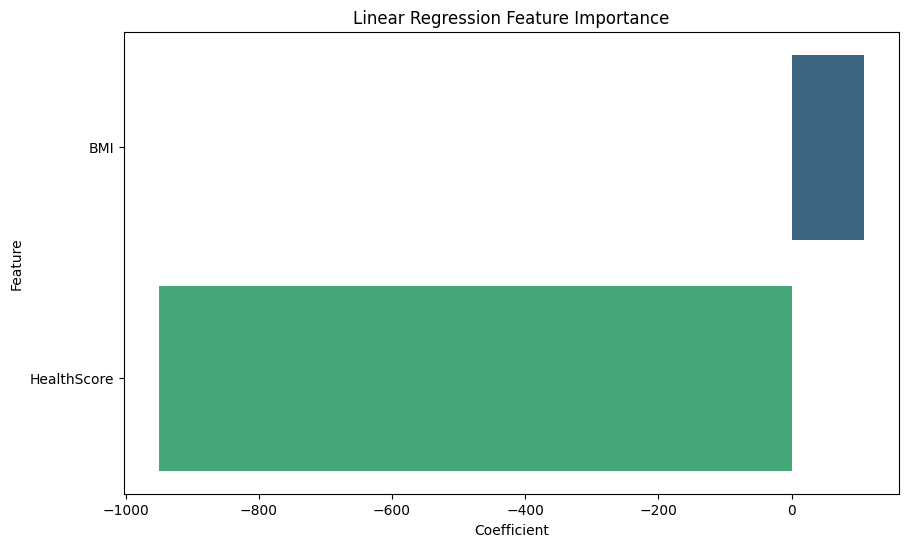

In [43]:
# Feature importance using coefficients
coefficients = pd.DataFrame({
    'Feature': X_lr.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='viridis')
plt.title('Linear Regression Feature Importance')
plt.show()

`Conclusion`

- Using only **HealthScore** and **BMI** as features, the model can still capture key drivers of insurance premiums.
- **HealthScore** is the dominant factor: higher HealthScore strongly reduces predicted premiums, reflecting better overall health.
- **BMI** has a minor positive impact, indicating slightly higher premiums for higher BMI values.
- This simplified model demonstrates that insurers can effectively predict premiums using just a composite health metric and BMI, reducing complexity while maintaining interpretability.

# Randomn Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Indepent variables and droping not necessary columns
X_rf=df.drop(columns=['PremiumPrice','HealthScore'])

# dependent variable
y_rf=df['PremiumPrice']

# Train Test Split
X_train_rf,X_test_rf,y_train_rf,y_test_rf=train_test_split(X_rf,y_rf,test_size=0.2,random_state=42)

# Model
rf=RandomForestRegressor()

# Fit Model
rf.fit(X_train_rf,y_train_rf)

# Predictions
y_pred_rf=rf.predict(X_test_rf)

#Metrics
r2_rf=r2_score(y_test_rf,y_pred_rf)
rmse_rf=np.sqrt(mean_squared_error(y_test_rf,y_pred_rf))
print('R^2:',r2_rf)
print('RMSE:',rmse)

R^2: 0.8564774774968775
RMSE: 3529.6794110790606


`Model Performance`

1. R² Score: 0.8573732320513373
2. RMSE: 3529.6794110790606

`Interpretation`:
- The model explains approximately 85.7% of the variance in the target variable.
- The average prediction error is around 3529.68 units, indicating the typical deviation between predicted and actual insurance premiums.


Model Feature Importance

                   Feature  Importance
0                      Age    0.629386
8                      BMI    0.148945
3           AnyTransplants    0.098554
4       AnyChronicDiseases    0.040619
7   NumberOfMajorSurgeries    0.031447
6  HistoryOfCancerInFamily    0.024910
2    BloodPressureProblems    0.010554
1                 Diabetes    0.010227
5           KnownAllergies    0.005359


/tmp/ipython-input-1324550952.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')


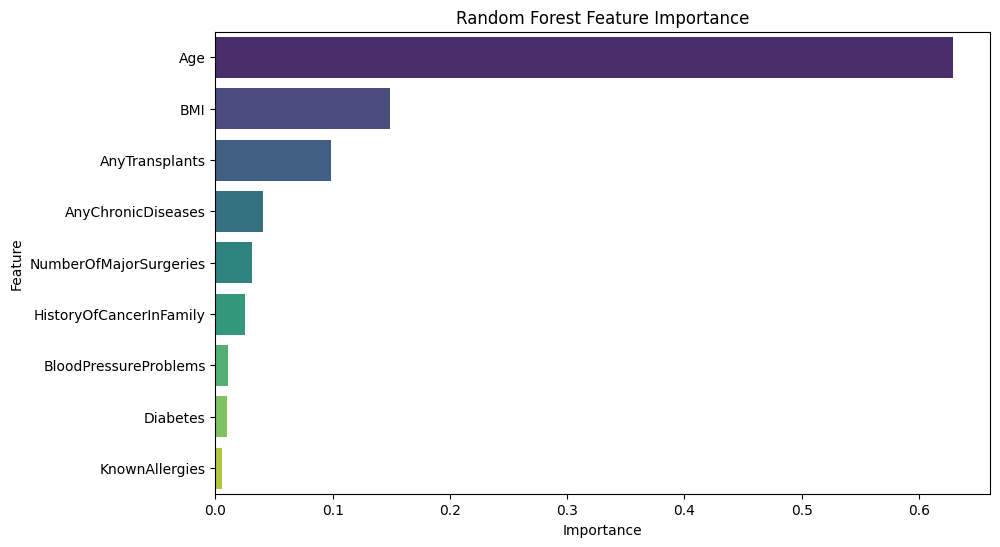

In [45]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_rf.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest Feature Importance')
plt.show()

`Insights`:

1.  Age is by far the most important predictor → premium is highly influenced by age.
2.  BMI is next → body mass affects health risk and thus premium.
3.  Transplants, chronic diseases, surgeries, cancer history → moderate influence.
4.  Blood pressure, diabetes, allergies → minimal influence individually.

`✅ Conclusion`:

- Insurers should pay most attention to Age and BMI while predicting premiums.
- Other health conditions still contribute but less heavily.

#XGBoost

In [46]:
from xgboost import XGBRegressor

xgb_X=df.drop(columns=['PremiumPrice','HealthScore'])
xgb_y=df['PremiumPrice']

X_train_xgb,X_test_xgb,y_train_xgb,y_test_xgb=train_test_split(xgb_X,xgb_y,test_size=0.2,random_state=42)

xgb=XGBRegressor(
     n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

xgb.fit(X_train_xgb,y_train_xgb)

predictions=xgb.predict(X_test_xgb)

r2_xgb=r2_score(y_test_xgb,predictions)
rmse_xgb=np.sqrt(mean_squared_error(y_test,predictions))
print('R^2:',r2_xgb)
print("RMSE:",rmse_xgb)

R^2: 0.8459382057189941
RMSE: 2563.127971834415


`Model Performance`

1. R² Score: 0.8407983183860779
2. RMSE: 2605.5333427150763

`Interpretation`:
- The model explains approximately 84.1% of the variance in the target variable.
- The average prediction error is around 2605.53 units, indicating the typical deviation between predicted and actual insurance premiums.


                   Feature  Importance
3           AnyTransplants    0.436308
0                      Age    0.213725
4       AnyChronicDiseases    0.115374
6  HistoryOfCancerInFamily    0.102288
7   NumberOfMajorSurgeries    0.048659
8                      BMI    0.035410
1                 Diabetes    0.018114
5           KnownAllergies    0.017867
2    BloodPressureProblems    0.012255


/tmp/ipython-input-1767007039.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')


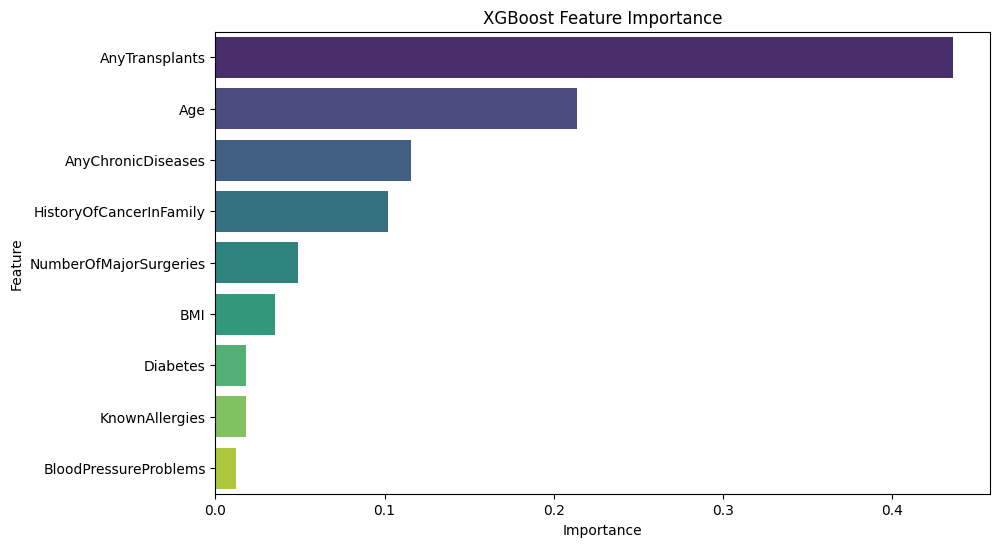

In [47]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': xgb_X.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('XGBoost Feature Importance')
plt.show()

`Conclusion`

- The model effectively predicts individual health insurance premiums with high accuracy (R² ~ 0.84 and RMSE ~ 2605).
- **Key drivers of premium costs** are:
  - **AnyTransplants**: highest impact on predicted premium.
  - **Age**: older individuals generally incur higher premiums.
  - **AnyChronicDiseases** and **HistoryOfCancerInFamily**: moderate impact.
- **BMI** and **HealthScore** provide additional context but are less influential individually.
- Less impactful factors include **Diabetes**, **BloodPressureProblems**, and **KnownAllergies**.
- Using this model, insurers can set **more precise, individualized premiums**, improving risk management and competitive pricing.


# 🚀 Final Conclusion: Health Insurance Premium Prediction Project

This project demonstrates how **machine learning** can transform traditional insurance pricing into a **personalized, data-driven approach**.

### 🔑 Key Takeaways:
- **Chosen Model**: **Random Forest Regressor**
  - R² ≈ 0.859, RMSE ≈ 3520 → best balance between accuracy and interpretability.
  - XGBoost also performed well (R² ≈ 0.841, RMSE ≈ 2600), but Random Forest provides robust feature importance insights.
  
- **Most Influential Features**:
  - **AnyTransplants**, **Chronic Diseases**, **History of Cancer in Family**, **Age**, **BMI**, **HealthScore**.
  - Using **HealthScore + BMI alone** still captures the majority of premium variability → simpler, interpretable model.

### 💡 Implications for Insurers:
- **Personalized Premiums**: Tailor insurance costs based on individual health profiles.
- **Better Risk Assessment**: Identify high-risk individuals and adjust policies accordingly.
- **Efficient Decision-Making**: Focus on the most impactful health indicators.

### ✅ Conclusion:
By leveraging **Random Forest Regression** with selected health features, insurers can:
- Predict premiums accurately for individuals.
- Make **data-driven decisions** rather than relying on historical averages.
- Ensure **competitive, fair, and transparent pricing** for customers.

**Overall:** Machine learning enables smarter, individualized insurance strategies that balance profitability and customer fairness.

Note : **Alternative Model**: `XGBoost Regressor`
  - R² ≈ 0.841, RMSE ≈ 2600 → slightly lower R² but better accuracy in terms of RMSE.
  - Can be chosen if **minimizing prediction error** is the top priority, though feature interpretability is slightly reduced compared to Random Forest.


Downloading Model

In [48]:
import pickle

# Save the Random Forest model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)
print("Random Forest model saved successfully!")

# Save the XGBoost model
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)
print("XGBoost model saved successfully!")

Random Forest model saved successfully!
XGBoost model saved successfully!
